In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(lsmeans))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(export))
suppressPackageStartupMessages(library(ggtext))
R.Version()

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”


$platform
[1] "x86_64-apple-darwin17.0"

$arch
[1] "x86_64"

$os
[1] "darwin17.0"

$system
[1] "x86_64, darwin17.0"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.2"

$year
[1] "2020"

$month
[1] "06"

$day
[1] "22"

$`svn rev`
[1] "78730"

$language
[1] "R"

$version.string
[1] "R version 4.0.2 (2020-06-22)"

$nickname
[1] "Taking Off Again"

In [2]:
profile <- read.csv(file = "/Users/yangzhang/Box/Zhang_Projects/MANUSCRIPT_PPAR/github_repo/PPAR/data/process/fig2_stat_corrected.csv", as.is = TRUE)
profile$Diet <- as.factor(profile$Diet)
profile$Diet <- factor(profile$Diet, levels = c("HFD", "HFD+LXN", "HFD+HXN", "HFD+TXN", "LFD"))
profile$MouseID <- ordered(profile$MouseID)
profile$MouseID <- as.factor(profile$MouseID); head(profile)

,Time,Diet,Cycle,MouseID,EE,VO2,VCO2,VH2O,RER
,<chr>,<fct>,<chr>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cycle1:06:00-07:00,LFD,light,1,0.5404855,1.817773,1.667495,0.07543786,0.9165888
2,Cycle1:07:00-08:00,LFD,light,1,0.4461322,1.506156,1.356034,0.09581117,0.8918554
3,Cycle1:08:00-09:00,LFD,light,1,0.3800183,1.302917,1.083944,0.06242484,0.8325571
4,Cycle1:09:00-10:00,LFD,light,1,0.5073735,1.732713,1.471611,0.07426177,0.8477622
5,Cycle1:10:00-11:00,LFD,light,1,0.4239801,1.468392,1.156785,0.08923397,0.7837234
6,Cycle1:11:00-12:00,LFD,light,1,0.3796648,1.319942,1.017954,0.07234710,0.7704386


In [3]:
data <- read.csv("/Users/yangzhang/Box/Zhang_Projects/MANUSCRIPT_PPAR/github_repo/PPAR/data/process/fig2_table3.csv", header = T); 
data$vars <- factor(data$Treatment, levels = c("LFD", "HFD", "HFD+LXN", "HFD+HXN", "HFD+TXN"))
data$vars2 <- factor(data$Treatment, levels = c("HFD", "HFD+LXN", "HFD+HXN", "HFD+TXN", "LFD"))
data <- data %>% mutate(lv_tot_tag = (LV_TAG * liver_wt)/1000,
                        EE_norm = avgEE*1000/Lean_mass, 
                        fecal_tot_tag = TG_feces2*fecal_tot_output, 
                        kkcal = Cal_cum/1000,
                        uptake_f = uptake_freq_light + uptake_freq_dark,
                        allMeters = allmeters_light+allmeters_dark,
                        allPeds = pedmeters_light+pedmeters_dark); head(data)
txn <- data %>% filter(vars2 == "HFD+TXN"); hfd <- data %>% filter(vars2 == "HFD");
lxn <- data %>% filter(vars2 == "HFD+LXN"); hxn <- data %>% filter(vars2 == "HFD+HXN");
lfd <- data %>% filter(vars2 == "LFD")

,ID,Treatment,Cal_cum,LV_TAG,lipidosis_area_pct,Fat_mass,subq_wt,epi_wat,mesenteric_wt,plasma_TAG,⋯,bw_cage,vars,vars2,lv_tot_tag,EE_norm,fecal_tot_tag,kkcal,uptake_f,allMeters,allPeds
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,LFD,1425.870,367.77,17.596,11.152,0.40,1.80,0.33,38.547,⋯,35.1,LFD,LFD,0.5810766,22.21568,17.55000,1.425870,23,227.4935,190.1555
2,2,LFD,1241.231,400.53,0.696,7.357,0.72,1.34,0.48,53.408,⋯,28.9,LFD,LFD,0.5126784,21.79943,15.02280,1.241231,26,267.6345,227.4692
3,3,LFD,1298.180,379.47,17.311,10.517,0.89,2.08,0.94,68.087,⋯,32.2,LFD,LFD,0.5236686,28.79635,13.38480,1.298180,23,251.1943,212.1898
4,4,LFD,1812.026,332.67,16.353,12.781,0.78,2.13,0.54,37.492,⋯,35.7,LFD,LFD,0.6520332,30.11525,20.70900,1.812026,34,295.1175,237.1283
5,5,LFD,1373.638,408.33,5.164,6.385,0.26,0.97,0.32,46.053,⋯,30.0,LFD,LFD,0.5634954,22.49855,17.52855,1.373638,29,262.2310,231.9523
6,6,LFD,1448.174,454.35,22.362,11.460,0.99,2.07,0.60,45.932,⋯,38.4,LFD,LFD,0.7224165,25.35729,7.85460,1.448174,50,234.2913,177.0421


In [4]:
theme_set(theme_bw())

In [7]:
theme_legend1 = function(){
	theme(axis.title.y = element_text(size = 15, 
	margin = margin(t=0, r=5, b=0, l=5)),
	axis.text.y = element_text(size = 13),
	axis.text.x = element_text(size = 13),
	axis.title.x = element_text(size = 15,
                               margin = margin(t=10, r=5, b=0, l=0)),
    #plot.title = element_text(size = 15, face = "bold"),
          plot.title = element_markdown(),
	legend.title = element_text(colour = "white"),
	legend.text = element_text(size = 16),
	legend.position = c(0.8, 0.2),
	plot.margin = unit(c(0.5,0.5,0,0.5), "cm"),
	panel.grid = element_blank())
}

In [5]:
source("/Users/yangzhang/Box/Zhang_Projects/MANUSCRIPT_PPAR/github_repo/PPAR/manuscript/figures/src/ggplotRegression.R")

In [8]:
dataF <- data %>%
filter(Treatment == "HFD" | Treatment == 'HFD+TXN')

dataF1 <- data %>% filter(Treatment == "HFD")
dataF2 <- data %>% filter(Treatment == "HFD+TXN")

In [9]:
dataF$color[dataF$Treatment == 'HFD'] = '#0080ff'
dataF$color[dataF$Treatment == 'HFD+TXN'] = 'darkgreen'

`geom_smooth()` using formula 'y ~ x'



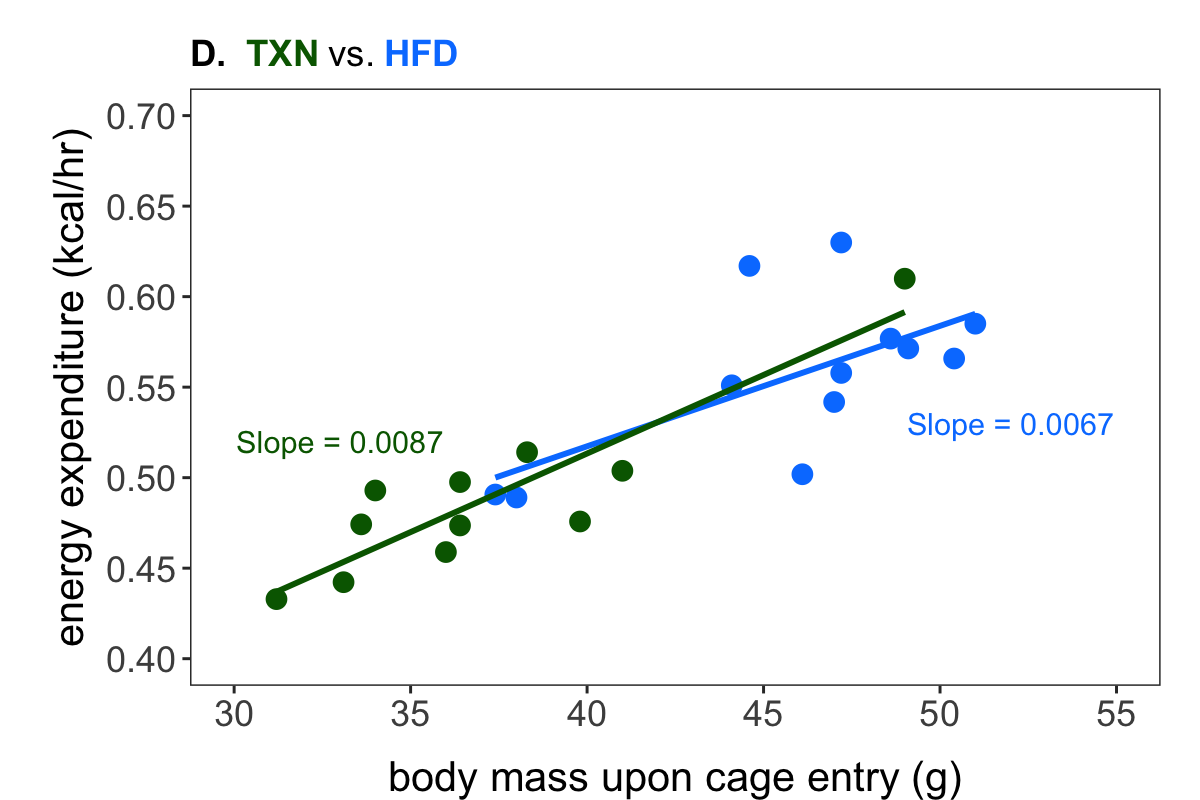

In [27]:
parD <- ggplot(dataF,aes(y = avgEE2, x = bw_cage, colour = color)) +
    geom_point(size=3) + geom_smooth(method = "lm", fill = NA) + 
    scale_y_continuous(limits = c(0.4, 0.7), breaks = seq(0.4, 0.7, 0.05)) +
    scale_x_continuous(limits = c(30, 55), breaks = seq(30, 55, 5)) +
    scale_color_identity() +
    ggtitle("**D.** <span style='color:darkgreen'>**TXN**</span> vs. <span style='color:#0080ff'>**HFD**</span>") + 
    ylab('energy expenditure (kcal/hr)') + 
    xlab('body mass upon cage entry (g)') + 
    annotate("text", x = 52, y = 0.53, label = "Slope = 0.0067", color = '#0080ff') +
    annotate("text", x = 33, y = 0.52, label = "Slope = 0.0087", color = 'darkgreen') +
    theme_legend1()
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
parD

In [28]:
dataJ <- data %>%
filter(Treatment == "HFD" | Treatment == 'LFD')
dataJ$color[dataJ$Treatment == 'HFD'] = '#0080ff'
dataJ$color[dataJ$Treatment == 'LFD'] = 'black'

In [29]:
dataJ1 <- data %>% filter(Treatment == "HFD")
dataJ2 <- data %>% filter(Treatment == "LFD")

`geom_smooth()` using formula 'y ~ x'



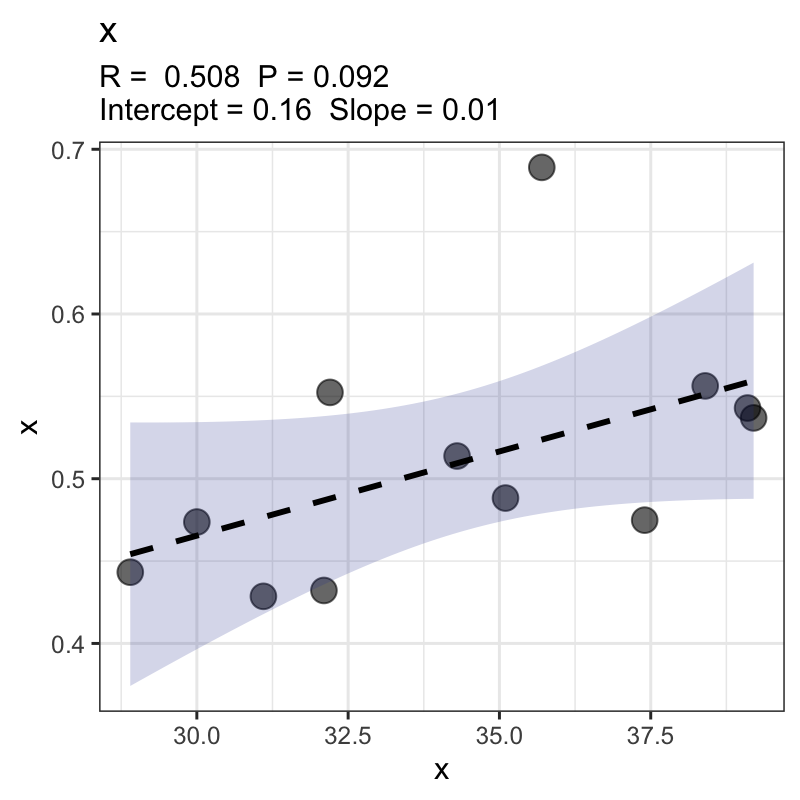

In [32]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 200)
ggplotRegression(lm(avgEE2 ~ bw_cage, data = dataJ2), "black")+ 
                        labs(title = "x", x = "x", y = "x")

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


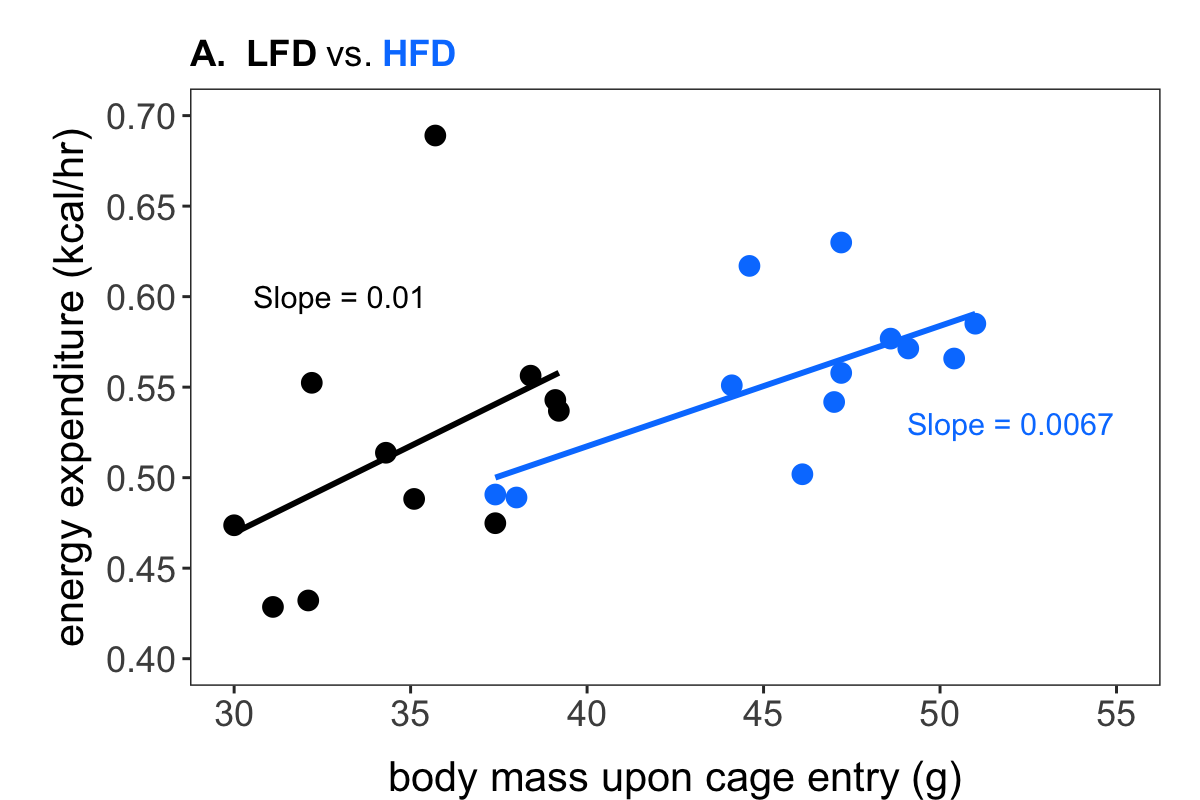

In [34]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
parA <- ggplot(dataJ,aes(y = avgEE2, x = bw_cage, colour = color)) +
   geom_point(size=3) + geom_smooth(method = "lm", fill = NA) + 
    scale_y_continuous(limits = c(0.4, 0.7), breaks = seq(0.4, 0.7, 0.05)) +
    scale_x_continuous(limits = c(30, 55), breaks = seq(30, 55, 5)) +
    scale_color_identity() +
    ggtitle("**A.** <span style='color:black'>**LFD**</span> vs. <span style='color:#0080ff'>**HFD**</span>") + 
    ylab('energy expenditure (kcal/hr)') + 
    xlab('body mass upon cage entry (g)') + 
    annotate("text", x = 52, y = 0.53, label = "Slope = 0.0067", color = '#0080ff') +
    annotate("text", x = 33, y = 0.6, label = "Slope = 0.01", color = 'black') +
    theme_legend1()
parA

In [36]:
dataG <- data %>%
filter(Treatment == "HFD" | Treatment == 'HFD+LXN')
dataG$color[dataG$Treatment == 'HFD'] = '#0080ff'
dataG$color[dataG$Treatment == 'HFD+LXN'] = '#ffa500'

`geom_smooth()` using formula 'y ~ x'



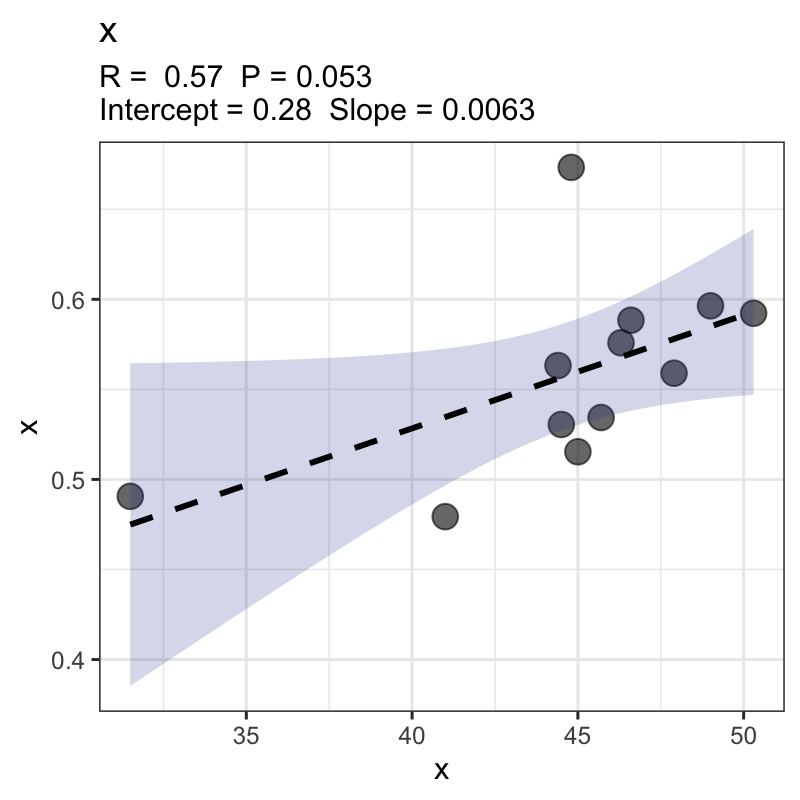

In [37]:
dataG2 <- data %>% filter(Treatment == "HFD+LXN")
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 200)
ggplotRegression(lm(avgEE2 ~ bw_cage, data = dataG2), "black")+ 
                        labs(title = "x", x = "x", y = "x")

`geom_smooth()` using formula 'y ~ x'



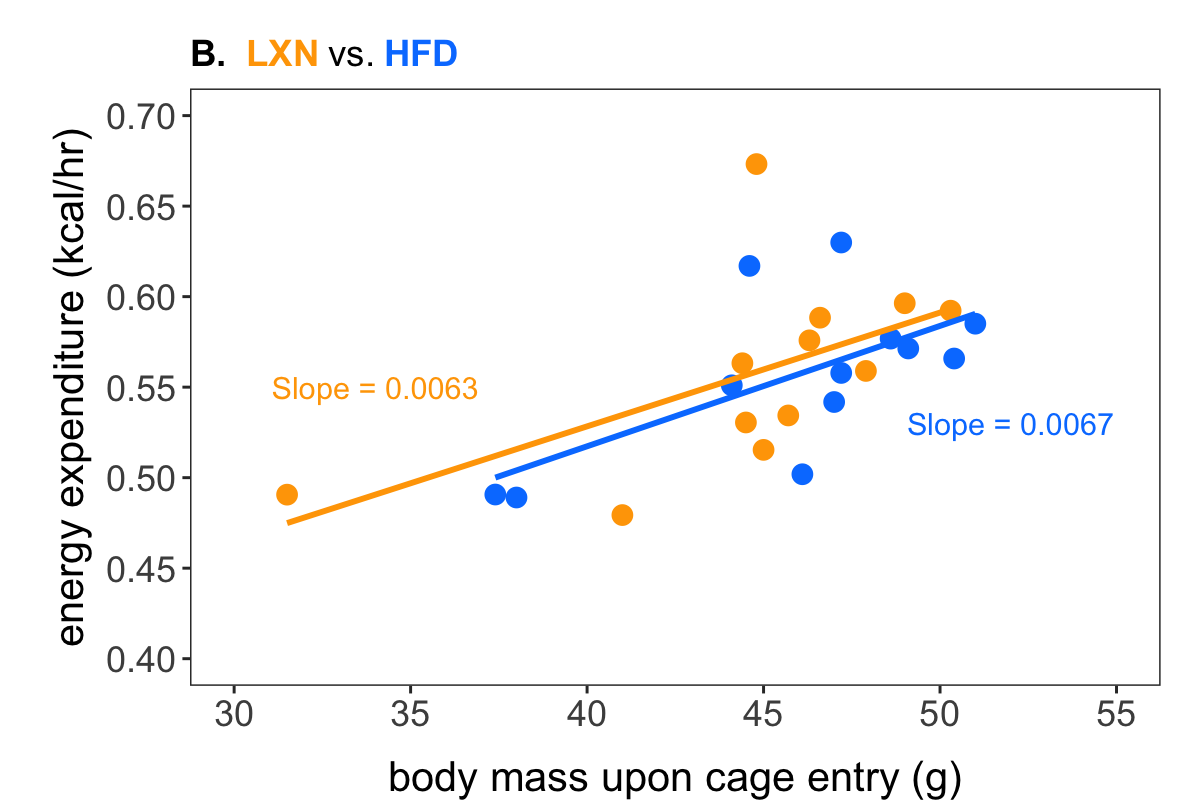

In [39]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
parB <- ggplot(dataG,aes(y = avgEE2, x = bw_cage, colour = color)) +
   geom_point(size=3) + geom_smooth(method = "lm", fill = NA) + 
    scale_y_continuous(limits = c(0.4, 0.7), breaks = seq(0.4, 0.7, 0.05)) +
    scale_x_continuous(limits = c(30, 55), breaks = seq(30, 55, 5)) +
    scale_color_identity() +
    ggtitle("**B.** <span style='color:#ffa500'>**LXN**</span> vs. <span style='color:#0080ff'>**HFD**</span>") + 
    ylab('energy expenditure (kcal/hr)') + 
    xlab('body mass upon cage entry (g)') + 
    annotate("text", x = 52, y = 0.53, label = "Slope = 0.0067", color = '#0080ff') +
    annotate("text", x = 34, y = 0.55, label = "Slope = 0.0063", color = '#ffa500') +
    theme_legend1()
parB

In [40]:
dataH <- data %>%
filter(Treatment == "HFD" | Treatment == 'HFD+HXN')
dataH$color[dataH$Treatment == 'HFD'] = '#0080ff'
dataH$color[dataH$Treatment == 'HFD+HXN'] = 'red'

`geom_smooth()` using formula 'y ~ x'



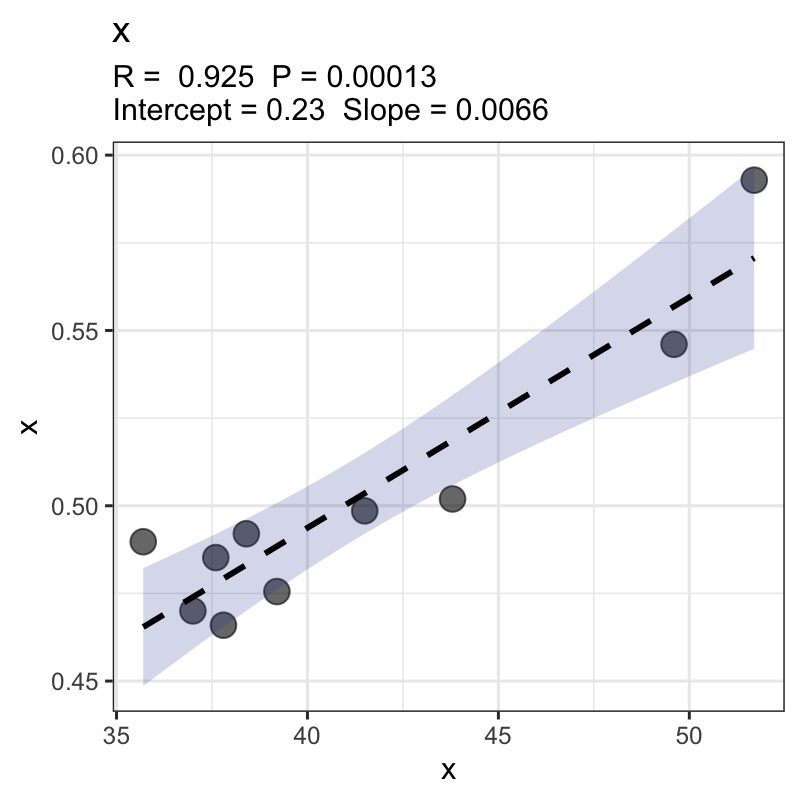

In [41]:
dataH2 <- data %>% filter(Treatment == "HFD+HXN")
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 200)
ggplotRegression(lm(avgEE2 ~ bw_cage, data = dataH2), "black")+ 
                        labs(title = "x", x = "x", y = "x")

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


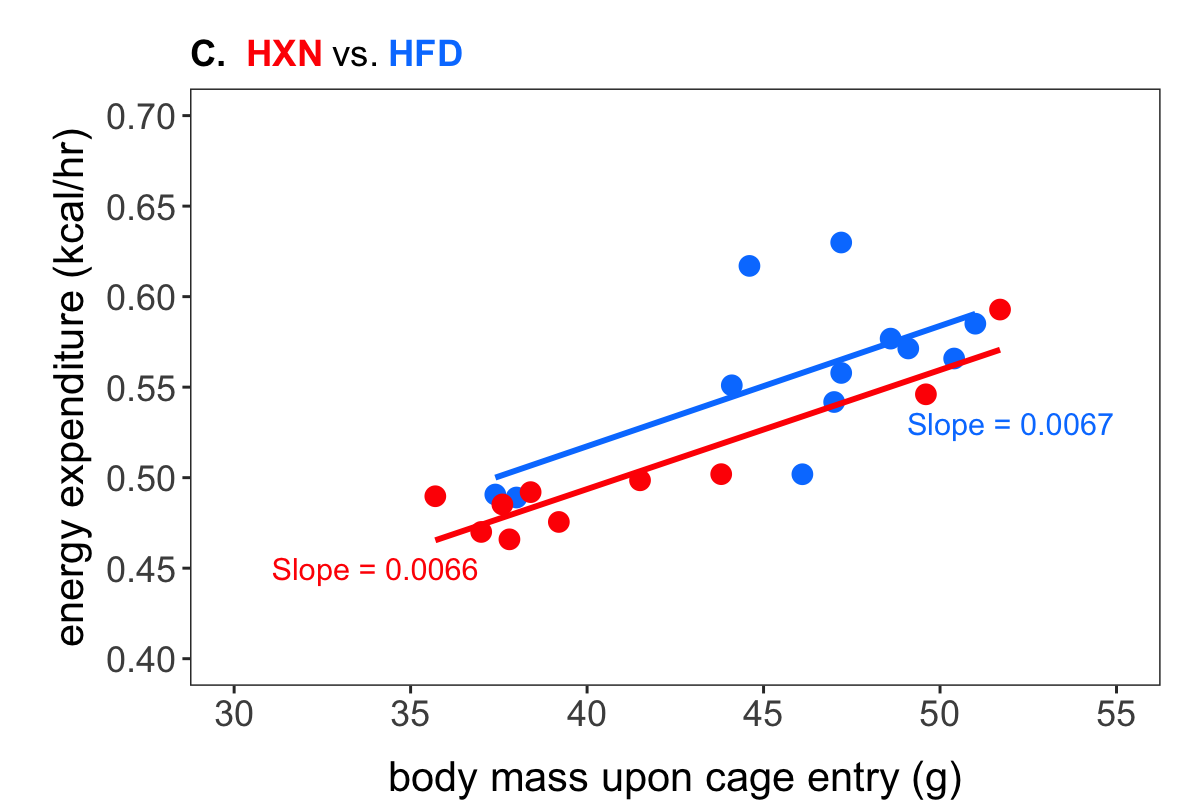

In [43]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
parC <- ggplot(dataH,aes(y = avgEE2, x = bw_cage, colour = color)) +
   geom_point(size=3) + geom_smooth(method = "lm", fill = NA) + 
    scale_y_continuous(limits = c(0.4, 0.7), breaks = seq(0.4, 0.7, 0.05)) +
    scale_x_continuous(limits = c(30, 55), breaks = seq(30, 55, 5)) +
    scale_color_identity() +
    ggtitle("**C.** <span style='color:red'>**HXN**</span> vs. <span style='color:#0080ff'>**HFD**</span>") + 
    ylab('energy expenditure (kcal/hr)') + 
    xlab('body mass upon cage entry (g)') + 
    annotate("text", x = 52, y = 0.53, label = "Slope = 0.0067", color = '#0080ff') +
    annotate("text", x = 34, y = 0.45, label = "Slope = 0.0066", color = 'red') +
    theme_legend1()
parC

In [45]:
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 200)
figS3 <- (parA | parB | parC | parD) + plot_layout(nrow = 2, ncol=2)

In [46]:
graph2pdf(figS3, "figureS3.pdf", width = 12, height = 8)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Exported graph as figureS3.pdf



References:
- https://www.infoworld.com/article/3527449/add-color-to-your-ggplot2-text-in-r.html
- http://www.sthda.com/english/wiki/ggplot2-texts-add-text-annotations-to-a-graph-in-r-software